In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os, shutil
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
#C:\Users\lenovo\Desktop\final year project\C-NMC_Leukemia
fold0_all = "C:/Users/lenovo/Desktop/final year project/C-NMC_Leukemia/training_data/fold_0/all"
fold1_all = "C:/Users/lenovo/Desktop/final year project/C-NMC_Leukemia/training_data/fold_1/all"
fold2_all = "C:/Users/lenovo/Desktop/final year project/C-NMC_Leukemia/training_data/fold_2/all"

fold0_nrml = "C:/Users/lenovo/Desktop/final year project/C-NMC_Leukemia/training_data/fold_0/hem"
fold1_nrml = "C:/Users/lenovo/Desktop/final year project/C-NMC_Leukemia/training_data/fold_1/hem"
fold2_nrml = "C:/Users/lenovo/Desktop/final year project/C-NMC_Leukemia/training_data/fold_2/hem"

val_data = "C:/Users/lenovo/Desktop/final year project/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data"
val_labels = pd.read_csv("C:/Users/lenovo/Desktop/final year project/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv")

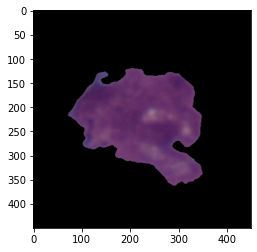

In [3]:
#blood cell with Acute lymphoblastic leukemia 
can_image_fnames = os.listdir(fold0_all)
cancer_img = imageio.imread(os.path.join(fold0_all,
                                         can_image_fnames[5]))
plt.imshow(cancer_img)
plt.show()

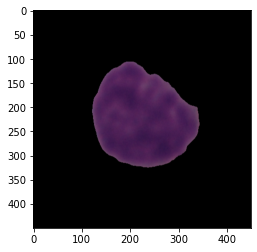

In [4]:
#blood cell without cancer
nrml_image_fnames = os.listdir(fold0_nrml)
cell_img = imageio.imread(os.path.join(fold0_nrml,
                                         nrml_image_fnames[5]))

plt.imshow(cell_img)
plt.show()

In [5]:
cell_img.shape
#image is 450x450 pxls with color

(450, 450, 3)

In [6]:
def get_path_image(folder):
    image_paths = []
    image_fnames = os.listdir(folder) 
    for img_id in range(len(image_fnames)):
        img = os.path.join(folder,image_fnames[img_id])
        image_paths.append(img)
    
    return image_paths

In [7]:
#image absolute paths for cancer cells
x_col = []

for i in [fold0_all,fold1_all,fold2_all]:
    paths = get_path_image(i)
    x_col.extend(paths)
print(len(x_col))

7272


In [8]:
#image absolute paths for normal cells
for i in [fold0_nrml,fold1_nrml,fold2_nrml]:
    paths = get_path_image(i)
    x_col.extend(paths)
print(len(x_col))

10661


In [9]:
canxr = {"x_col":x_col,
         "y_col":[np.nan for x in range(len(x_col))]}

In [10]:
train_df = pd.DataFrame(canxr) 

In [11]:
train_df

,x_col,y_col
0,C:/Users/lenovo/Desktop/final year project/C-N...,NaN
1,C:/Users/lenovo/Desktop/final year project/C-N...,NaN
2,C:/Users/lenovo/Desktop/final year project/C-N...,NaN
3,C:/Users/lenovo/Desktop/final year project/C-N...,NaN
4,C:/Users/lenovo/Desktop/final year project/C-N...,NaN
...,...,...
10656,C:/Users/lenovo/Desktop/final year project/C-N...,NaN
10657,C:/Users/lenovo/Desktop/final year project/C-N...,NaN
10658,C:/Users/lenovo/Desktop/final year project/C-N...,NaN
10659,C:/Users/lenovo/Desktop/final year project/C-N...,NaN


In [12]:
train_df["y_col"][0:7272] = "ALL"
train_df["y_col"][7272:10662] = "HEM"

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11448\3683167656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["y_col"][0:7272] = "ALL"


In [13]:
train_df["y_col"][7271:7280]

7271    ALL
7272    HEM
7273    HEM
7274    HEM
7275    HEM
7276    HEM
7277    HEM
7278    HEM
7279    HEM
Name: y_col, dtype: object

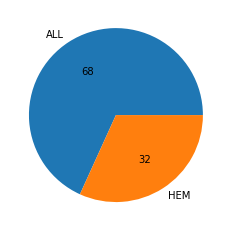

In [14]:
plt.pie([len(train_df[train_df["y_col"]=="ALL"]),len(train_df[train_df["y_col"]=="HEM"])],
        labels=["ALL","HEM"],autopct='%.f'
       )
plt.gca()
plt.show()

In [15]:
val_x = get_path_image(val_data)


In [16]:
len(val_x)

1867

In [17]:
val_labels["labels"].head(3)

0    1
1    1
2    1
Name: labels, dtype: int64

In [18]:
val_dict = {"x_col":val_x,
           "y_col":val_labels["labels"]}

In [19]:
val_df = pd.DataFrame(val_dict)
val_df["y_col"].replace(to_replace=[1,0],value=["ALL","HEM"],inplace=True)

In [20]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x_col   1867 non-null   object
 1   y_col   1867 non-null   object
dtypes: object(2)
memory usage: 29.3+ KB


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10661 entries, 0 to 10660
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x_col   10661 non-null  object
 1   y_col   10661 non-null  object
dtypes: object(2)
memory usage: 166.7+ KB


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator()
val_gen = ImageDataGenerator()

train_generator = train_gen.flow_from_dataframe(
    train_df,
    x_col="x_col",
    y_col="y_col",
    target_size=(450, 450),
    batch_size=32,
    color_mode="rgb",
    shuffle=True,
    class_mode='binary')

val_generator = train_gen.flow_from_dataframe(
    val_df,
    x_col="x_col",
    y_col="y_col",
    target_size=(450, 450),
    batch_size=32,
    color_mode="rgb",
    shuffle=True,
    class_mode='binary')


Found 10661 validated image filenames belonging to 2 classes.
Found 1867 validated image filenames belonging to 2 classes.


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Conv2D)             (None, 446, 446, 6)       456       
                                                                 
 layer2 (MaxPooling2D)       (None, 223, 223, 6)       0         
                                                                 
 layer3 (Conv2D)             (None, 219, 219, 16)      2416      
                                                                 
 layer4 (MaxPooling2D)       (None, 109, 109, 16)      0         
                                                                 
 flatten_2 (Flatten)         (None, 190096)            0         
                                                                 
 dense_4 (Dense)             (None, 120)               22811640  
                                                                 
 batch_normalization_4 (Batc  (None, 120)             

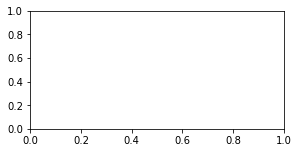

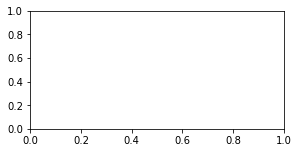

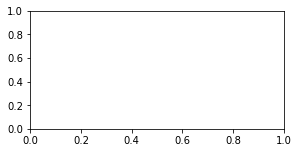

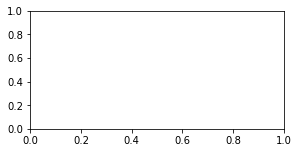

In [31]:
#Check output after fitting model on different lr.
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3]
for i in range(len(learning_rates)):
    plt.figure(figsize=(10,10))
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a learning rate
    #modelFitter(train_generator,10,val_generator,batch_size=32,lr=learning_rates[i])
#plt.show()

#This will be usefull in checking what learning rate is suitable for our purpose.

import keras as ks
lr = learning_rates
model = Sequential()
#opt = ks.optimizers(learning_rate=lr,decay=1e-4)
'''callback = tf.ks.callbacks.EarlyStopping(monitor="val_loss",
                                          patience=10,
                                          verbose=2)'''
    #building architecture
    #Adding layers
model.add(ks.layers.Conv2D(6,(5,5),activation="elu",
                               name="layer1",
                               input_shape=(450,450,3))) 
model.add(ks.layers.MaxPooling2D((2,2),strides=2,name="layer2"))
model.add(ks.layers.Conv2D(16,(5,5),activation="elu",name="layer3"))
model.add(ks.layers.MaxPooling2D((2,2),strides=2,name="layer4"))
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(120,activation="elu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=ks.regularizers.l2(0.01)))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dense(84,activation="elu",
                               kernel_regularizer=ks.regularizers.l2(0.01)))
model.add(ks.layers.BatchNormalization())
   
model.add(ks.layers.Dense(1,activation="sigmoid",name="output"))#2 classes 
summmry = model.summary()
    #Compile the model.
    #setting optimisation, cost funciton and metric to be used

    

In [ ]:
model.compile(loss="binary_crossentropy",
                  optimizer='adam',
                  metrics=["accuracy"])
history = model.fit(train_generator,
                        steps_per_epoch=100,
                        epochs=2,
                        batch_size=512,
                        validation_data=val_generator,
                        validation_steps=50)
   #Visualise curves
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='valid_acc')
plt.title('lrate='+str(lr), pad=-50)
plt.legend()
plt.grid(True)


Epoch 1/2
100/100 [==============================] - 12102s 121s/step - loss: 2.4950 - accuracy: 0.7784 - val_loss: 1.8692 - val_accuracy: 0.6206
Epoch 2/2
 74/100 [=====================>........] - ETA: 31:45 - loss: 1.2994 - accuracy: 0.8171

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator()
val_gen = ImageDataGenerator()

train_generator = train_gen.flow_from_dataframe(
    train_df,
    x_col="x_col",
    y_col="y_col",
    target_size=(227, 227),
    batch_size=32,
    color_mode="rgb",
    shuffle=True,
    class_mode='binary')

val_generator = train_gen.flow_from_dataframe(
    val_df,
    x_col="x_col",
    y_col="y_col",
    target_size=(227, 227),
    batch_size=32,
    color_mode="rgb",
    shuffle=True,
    class_mode='binary')


In [ ]:
def alexnet(train_generator,epchs,val_generator,batch_size,lr):
    import keras as ks
    model = ks.models.Sequential()
    opt = ks.optimizers.Nadam(learning_rate=lr,decay=1e-4)
    callback = ks.callbacks.EarlyStopping(monitor="val_loss",
                                          patience=10,
                                          verbose=2)
    #building architecture
    #Adding layers
    model.add(ks.layers.Conv2D(96,(11,11),
                               strides=4,
                               activation="relu",
                               name="layer1",
                               input_shape=(227,227,3))) 
    model.add(ks.layers.MaxPooling2D((3,3),strides=2,name="layer2"))
    model.add(ks.layers.Conv2D(256,(5,5),padding="valid",activation="relu",name="layer3"))
    model.add(ks.layers.MaxPooling2D((3,3),strides=2,name="layer4"))
    model.add(ks.layers.Conv2D(384,(3,3),padding="valid",activation="relu",name="layer5"))
    model.add(ks.layers.Conv2D(384,(3,3),padding="valid",activation="relu",name="layer6"))
    model.add(ks.layers.Conv2D(256,(3,3),padding="valid",activation="relu",name="layer7"))
    model.add(ks.layers.MaxPooling2D((3,3),strides=2,name="layer8"))
    model.add(ks.layers.Flatten())
    model.add(ks.layers.Dense(1024,activation="elu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=ks.regularizers.l2(0.01)))
    model.add(ks.layers.BatchNormalization())
    model.add(ks.layers.Dense(1024,activation="elu",
                               kernel_regularizer=ks.regularizers.l2(0.01)))
    model.add(ks.layers.BatchNormalization())
    
    model.add(ks.layers.Dense(1,activation="sigmoid",
                              kernel_initializer="glorot_uniform",
                              name="output"))#2 classes 
    summmry = model.summary()
    #Compile the model.
    #setting optimisation, cost funciton and metric to be used
    model.compile(loss="binary_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"])
    history = model.fit(train_generator,
                        steps_per_epoch=100,
                        epochs=epchs,
                        callbacks=[callback],
                        batch_size=batch_size,
                        validation_data=val_generator,
                        validation_steps=50)
    #Visualise curves
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='valid_acc')
    plt.title('lrate='+str(lr), pad=-50)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return history


In [ ]:
#Check output after fitting model on different lr.
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3]
for i in range(len(learning_rates)):
    plt.figure(figsize=(10,10))
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a learning rate
    alexnet(train_generator,10,val_generator,batch_size=32,lr=learning_rates[i])
plt.show()

In [ ]:
history1 = modelFitter(train_generator,100,val_generator,batch_size=16,lr=1.0)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator()
val_gen = ImageDataGenerator()

train_generator = train_gen.flow_from_dataframe(
    train_df,
    x_col="x_col",
    y_col="y_col",
    target_size=(227, 227),
    batch_size=32,
    color_mode="rgb",
    shuffle=True,
    class_mode='binary')

val_generator = train_gen.flow_from_dataframe(
    val_df,
    x_col="x_col",
    y_col="y_col",
    target_size=(227, 227),
    batch_size=32,
    color_mode="rgb",
    shuffle=True,
    class_mode='binary')

history2 = alexnet(train_generator,100,val_generator,batch_size=16,lr=1E+1)